In [340]:
from pandas.compat import StringIO
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

In [100]:
df1_data = pd.read_csv('Archipelago_Transaction_May.csv')
df2_data = pd.read_csv('Archipelago_Transaction_June.csv')
df3_data = pd.read_csv('Archipelago_Transaction_July.csv')
df4_data = pd.read_csv('Archipelago_Transaction_August.csv')
df5_data = pd.read_csv('Archipelago_Transaction_Sept.csv')
df6_data = pd.read_csv('Archipelago_Transaction_Octo.csv')

In [7]:
user_data = pd.read_csv('user_data.csv')

In [441]:
print df5_data['Created At'].min()
print df5_data['Created At'].max()
print len(user_data)

2018-09-01 00:01:40
2018-09-30 23:57:57
1099


In [161]:
print archie['Created At'].min()
print archie['Created At'].max()

2017-07-01 00:01:16
2017-12-31 23:59:54


## Data Cleaning

### Data transaction df

In [519]:
df1_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300200 entries, 0 to 300199
Data columns (total 31 columns):
Order ID                  300200 non-null object
Created At                300200 non-null object
Updated At                300200 non-null object
Partner                   300198 non-null object
Cluster                   300198 non-null object
Area                      300198 non-null object
Operator                  300200 non-null object
Phone Number              300200 non-null object
Customer Number           300200 non-null object
Denom                     300200 non-null int64
Label                     300200 non-null object
SKU                       300200 non-null object
Product Type              300200 non-null object
Sell Price                300200 non-null float64
Admin Fee Seller          300200 non-null int64
Total Margin              300200 non-null int64
Premi                     300200 non-null int64
Purchase Price            300200 non-null float64
Purchase 

In [520]:
print df1_data.columns.tolist()

['Order ID', 'Created At', 'Updated At', 'Partner', 'Cluster', 'Area', 'Operator', 'Phone Number', 'Customer Number', 'Denom', 'Label', 'SKU', 'Product Type', 'Sell Price', 'Admin Fee Seller', 'Total Margin', 'Premi', 'Purchase Price', 'Purchase Price Kraken', 'MD Fee', 'Seller ID', 'Seller', 'Seller Name', 'Upline', 'Status', 'Response Time (Second)', 'Biller', 'Response Code', 'SN / Serial Number', 'SMS Fee', 'Status Message']


In [522]:
## Remove unnessary cols ##
cols_drop = ['Order ID', 'Updated At', 'SKU', 'Admin Fee Seller', 'Total Margin', 'Premi', 'Purchase Price Kraken', 'MD Fee', 'Seller', 'Response Time (Second)', 'Biller', 'Response Code', 'SN / Serial Number', 'SMS Fee', 'Status Message'] 
df1 = df1_data.drop(cols_drop , 1)
df2 = df2_data.drop(cols_drop , 1)
df3 = df3_data.drop(cols_drop , 1)
df4 = df4_data.drop(cols_drop , 1)
df5 = df5_data.drop(cols_drop , 1)
df6 = df6_data.drop(cols_drop , 1)

In [523]:
df1.head()

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
0,2018-05-01 00:00:50,Golden Technology,Lampung,Nasional,3,081279548000,089632143632,10000,Tri 10.000,Mobile,10100.0,9848.0,28127.0,Babun Cell,082379212771,success
1,2018-05-01 00:01:22,Lapak Kita,Tegal,Kota Tegal,Telkomsel Modem,082324722727,082242160882,50000,Telkomsel 50.000,Mobile,49200.0,0.0,25569.0,Yazid cell,082339418669,success
2,2018-05-01 00:02:34,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,081378513565,085355036699,10000,Telkomsel 10.000,Mobile,10700.0,0.0,22582.0,ANNISA,08117587313,success
3,2018-05-01 00:03:27,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,082169416891,082384289308,50000,Telkomsel 50.000,Mobile,49300.0,0.0,1830.0,Abid,08117587253,success
4,2018-05-01 00:09:00,Lapak Kita,Tegal,Kota Tegal,Telkomsel Modem,082324722727,082242160883,50000,Telkomsel 50.000,Mobile,49200.0,0.0,25569.0,Yazid cell,082339418669,success


In [524]:
## Merge all dataframes ##
dataframes = [df1, df2, df3, df4, df5, df6]
df = pd.concat(dataframes)

In [525]:
df.tail(3)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
416210,2018-10-31 23:56:37,Golden Technology,Langsa,Kab. Aceh Timur,Telkomsel Modem,082369547105,81265314438,5000,Telkomsel 5.000,Mobile,5700.0,5500.0,19886.0,SABRI,085359822993,success
416211,2018-10-31 23:56:59,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,081276169999,82198934660,50000,Telkomsel 50.000,Mobile,49300.0,0.0,870.0,suryadi,08117587151,success
416212,2018-10-31 23:58:10,Alphapay,Nasional,Banyu Asih,Axis,085777981367,83895934354,25000,Axis 25.000,Mobile,24850.0,24635.0,38207.0,abla cell,085885686888,success


In [526]:
## Check missing value ##
print len(df)
df.isnull().sum()

2144540


Created At            0
Partner              15
Cluster              15
Area                 15
Operator              0
Phone Number          0
Customer Number       0
Denom                 0
Label                 0
Product Type          0
Sell Price            0
Purchase Price        0
Seller ID            15
Seller Name          15
Upline             3305
Status                0
dtype: int64

In [527]:
# Saving dataframes to csv
df.to_csv('archie_May_Oct.csv', index=False)

-------------------------------------------------------------------------------------------------------------

In [4]:
df.head(2)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
0,2018-05-01 00:00:50,Golden Technology,Lampung,Nasional,3,081279548000,089632143632,10000,Tri 10.000,Mobile,10100.0,9848.0,28127.0,Babun Cell,082379212771,success
1,2018-05-01 00:01:22,Lapak Kita,Tegal,Kota Tegal,Telkomsel Modem,082324722727,082242160882,50000,Telkomsel 50.000,Mobile,49200.0,0.0,25569.0,Yazid cell,082339418669,success


In [5]:
df[df['Partner'].isnull()].head(3)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
18151,2018-05-02 20:15:08,NaN,NaN,NaN,Telkomsel Modem,082385606400,081365296200,50000,Telkomsel 50.000,Mobile,49300.0,0.0,NaN,NaN,NaN,success
137468,2018-05-15 08:17:07,NaN,NaN,NaN,Indosat,082278344207,081541129872,10000,Indosat 10.000,Mobile,10875.0,10700.0,NaN,NaN,NaN,success
306614,2018-06-01 18:13:48,NaN,NaN,NaN,PLN Prepaid,082384816401,32137321777,50000,"PLN Prepaid Rp. 50,000",Electricity,50800.0,50600.0,NaN,NaN,NaN,success


In [529]:
df[df['Phone Number'] == '082278344207'].head(3)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
1473,2018-05-01 09:23:58,Golden Technology,Lampung,Nasional,Telkomsel Modem,082278344207,082176720887,5000,Telkomsel 5.000,Mobile,5400.0,5300.0,4667.0,Sri Hartati,08117290777,success
1481,2018-05-01 09:24:28,Golden Technology,Lampung,Nasional,Telkomsel Modem,082278344207,082176720887,10000,Telkomsel 10.000,Mobile,10400.0,10300.0,4667.0,Sri Hartati,08117290777,success
27169,2018-05-03 19:10:24,Golden Technology,Lampung,Nasional,3,082278344207,089648904353,10000,Tri 10.000,Mobile,10100.0,9848.0,4667.0,Sri Hartati,08117290777,success


In [530]:
df[(df['Phone Number']=='081367946886') & (df['Upline'].isnull())].head(1)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
176698,2018-07-17 09:41:01,Golden Technology,Lampung,Nasional,Telkomsel Modem,081367946886,81230790708,50000,Telkomsel Data 50.000,Data,49100.0,49000.0,32698.0,Noviliza,NaN,success


In [531]:
df[(df['Phone Number']=='081367946886') & (df['Upline'].notnull())].head()

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,Seller ID,Seller Name,Upline,Status
22789,2018-06-03 11:42:10,Golden Technology,Lampung,Nasional,PLN Postpaid,081367946886,171000413029,0,PLN Postpaid,Postpaid Electricity,673804.0,675004.0,4620.0,EO Meylani,08117290777,success


In [6]:
df = df.rename(columns = {'Phone Number':'phonenumber'})
df = df.rename(columns = {'Seller ID':'seller_id'})

In [7]:
df.tail()

,Created At,Partner,Cluster,Area,Operator,phonenumber,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,seller_id,Seller Name,Upline,Status
2144535,2018-10-31 23:53:37,Alphapay,Nasional,Banyu Asih,3,085777981367,895396840652,2000,Tri 2000,Mobile,2100.0,1970.0,38207.0,abla cell,085885686888,success
2144536,2018-10-31 23:54:36,Alphapay,Nasional,Banyu Asih,Indosat,085777981367,85893930591,5000,Indosat 5.000,Mobile,5950.0,5460.0,38207.0,abla cell,085885686888,success
2144537,2018-10-31 23:56:37,Golden Technology,Langsa,Kab. Aceh Timur,Telkomsel Modem,082369547105,81265314438,5000,Telkomsel 5.000,Mobile,5700.0,5500.0,19886.0,SABRI,085359822993,success
2144538,2018-10-31 23:56:59,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,081276169999,82198934660,50000,Telkomsel 50.000,Mobile,49300.0,0.0,870.0,suryadi,08117587151,success
2144539,2018-10-31 23:58:10,Alphapay,Nasional,Banyu Asih,Axis,085777981367,83895934354,25000,Axis 25.000,Mobile,24850.0,24635.0,38207.0,abla cell,085885686888,success


--------------------------------------------------------------------------------------------------------------

# User role data

In [27]:
user_data = pd.read_csv('user_data.csv')

In [28]:
user_data.head(5)

,id,fullname,phonenumber,created_at,role_name,total_user
0,18821,Yeti,085710772133,2017-11-06 21:42:39,NaN,NaN
1,15702,winnie,081281100026,2017-10-26 22:26:27,NaN,NaN
2,19898,Pronghorn,08100000000,2017-12-17 22:02:49,NaN,NaN
3,18823,Ayu,081212037702,2017-11-06 21:44:02,NaN,NaN
4,19473,Donny JPX,08119913776,2017-08-09 08:08:21,NaN,NaN


In [29]:
user_data.isnull().sum()

id                 0
fullname          31
phonenumber        1
created_at         0
role_name         31
total_user     29346
dtype: int64

In [30]:
user_data['role_name'].unique()

array([nan, 'SELLER,TELKOMSEL', 'SELLER,SALES AGENT', 'SELLER,JAWAPOS',
       'SELLER,HELP DESK', 'SELLER EMPLOYEE', 'SELLER',
       'SALES AGENT,SELLER', 'SALES AGENT', 'SADM', 'OPERATOR',
       'OPERATION', 'NO ACCESS', 'MGR PUSAT', 'MGR DAERAH', 'MGR',
       'HELP DESK,SELLER', 'HELPDESK DAERAH', 'HELP DESK', 'FINANCE',
       'AGENT MD', 'AGENT', 'ADM MOBO', 'ADM'], dtype=object)

In [31]:
user_data[user_data['role_name'] == 'SELLER,SALES AGENT']

,id,fullname,phonenumber,created_at,role_name,total_user
32,23959,YOGI,082134212021,2017-10-30 16:50:00,"SELLER,SALES AGENT",2.0
33,2635,Galuh,082136126665,2017-09-25 18:01:57,"SELLER,SALES AGENT",NaN
34,4329,NaN,081808314096,2017-09-25 18:03:41,"SELLER,SALES AGENT",NaN


In [32]:
user_data = user_data.rename(columns = {'id':'seller_id'})
user_data.head(5)

,seller_id,fullname,phonenumber,created_at,role_name,total_user
0,18821,Yeti,085710772133,2017-11-06 21:42:39,NaN,NaN
1,15702,winnie,081281100026,2017-10-26 22:26:27,NaN,NaN
2,19898,Pronghorn,08100000000,2017-12-17 22:02:49,NaN,NaN
3,18823,Ayu,081212037702,2017-11-06 21:44:02,NaN,NaN
4,19473,Donny JPX,08119913776,2017-08-09 08:08:21,NaN,NaN


In [33]:
user_data.role_name = user_data.role_name.fillna('Other')
user_data.fullname = user_data.fullname.fillna('Other')
user_data.total_user = user_data.total_user.fillna(0)
user_data.phonenumber = user_data.phonenumber.fillna(0)

In [34]:
user_data.isnull().sum()

seller_id      0
fullname       0
phonenumber    0
created_at     0
role_name      0
total_user     0
dtype: int64

In [35]:
user_data.head()

,seller_id,fullname,phonenumber,created_at,role_name,total_user
0,18821,Yeti,085710772133,2017-11-06 21:42:39,Other,0.0
1,15702,winnie,081281100026,2017-10-26 22:26:27,Other,0.0
2,19898,Pronghorn,08100000000,2017-12-17 22:02:49,Other,0.0
3,18823,Ayu,081212037702,2017-11-06 21:44:02,Other,0.0
4,19473,Donny JPX,08119913776,2017-08-09 08:08:21,Other,0.0


In [16]:
user_data[user_data['seller_id'] == 30534]

,seller_id,fullname,phonenumber,created_at,role_name,total_user
30441,30534,Dika W - Team Support,08122,2018-05-24 11:08:24,ADM,0.0


In [36]:
user_data[user_data['role_name'] == 'SELLER,SALES AGENT']

,seller_id,fullname,phonenumber,created_at,role_name,total_user
32,23959,YOGI,082134212021,2017-10-30 16:50:00,"SELLER,SALES AGENT",2.0
33,2635,Galuh,082136126665,2017-09-25 18:01:57,"SELLER,SALES AGENT",0.0
34,4329,Other,081808314096,2017-09-25 18:03:41,"SELLER,SALES AGENT",0.0


In [38]:
user_details = user_data.drop(['fullname', 'phonenumber', 'created_at'], 1)

In [39]:
user_details.head()

,seller_id,role_name,total_user
0,18821,Other,0.0
1,15702,Other,0.0
2,19898,Other,0.0
3,18823,Other,0.0
4,19473,Other,0.0


--------------------------------------------------------------------------------------------------------------

# Seller data

In [8]:
seller_data = pd.read_csv('archie_May_Oct.csv')

In [9]:
seller_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144540 entries, 0 to 2144539
Data columns (total 16 columns):
Created At         object
Partner            object
Cluster            object
Area               object
Operator           object
Phone Number       object
Customer Number    object
Denom              int64
Label              object
Product Type       object
Sell Price         float64
Purchase Price     float64
Seller ID          float64
Seller Name        object
Upline             object
Status             object
dtypes: float64(3), int64(1), object(12)
memory usage: 261.8+ MB


In [10]:
len(seller_data)

2144540

In [11]:
seller_data = seller_data.rename(columns = {'Seller ID':'seller_id'})

In [12]:
seller_data.head(5)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,seller_id,Seller Name,Upline,Status
0,2018-05-01 00:00:50,Golden Technology,Lampung,Nasional,3,081279548000,089632143632,10000,Tri 10.000,Mobile,10100.0,9848.0,28127.0,Babun Cell,082379212771,success
1,2018-05-01 00:01:22,Lapak Kita,Tegal,Kota Tegal,Telkomsel Modem,082324722727,082242160882,50000,Telkomsel 50.000,Mobile,49200.0,0.0,25569.0,Yazid cell,082339418669,success
2,2018-05-01 00:02:34,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,081378513565,085355036699,10000,Telkomsel 10.000,Mobile,10700.0,0.0,22582.0,ANNISA,08117587313,success
3,2018-05-01 00:03:27,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,082169416891,082384289308,50000,Telkomsel 50.000,Mobile,49300.0,0.0,1830.0,Abid,08117587253,success
4,2018-05-01 00:09:00,Lapak Kita,Tegal,Kota Tegal,Telkomsel Modem,082324722727,082242160883,50000,Telkomsel 50.000,Mobile,49200.0,0.0,25569.0,Yazid cell,082339418669,success


In [54]:
seller_data.isnull().sum()

Created At            0
Partner              15
Cluster              15
Area                 15
Operator              0
Phone Number          0
Customer Number       0
Denom                 0
Label                 0
Product Type          0
Sell Price            0
Purchase Price        0
seller_id            15
Seller Name          15
Upline             3305
Status                0
dtype: int64

In [55]:
# Remove 'user_id = Null' from dataframe 
seller_data = seller_data[seller_data['seller_id'].notnull()]

In [56]:
seller_data[seller_data['seller_id'] == 38207.0].head(2)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,seller_id,Seller Name,Upline,Status
2081860,2018-10-27 16:39:46,Alphapay,Nasional,Banyu Asih,3,085777981367,89602958977,10000,Tri 10.000,Mobile,9950.0,9810.0,38207.0,abla cell,085885686888,success
2081886,2018-10-27 16:41:38,Alphapay,Nasional,Banyu Asih,3,085777981367,89661061250,25000,Tri 25.000,Mobile,24700.0,24510.0,38207.0,abla cell,085885686888,success


In [57]:
user_data[user_data['seller_id'] == 38207.0]

,seller_id,fullname,phonenumber,created_at,role_name,total_user
12879,38207,abla cell,085777981367,2018-10-27 15:05:45,SELLER,0.0


In [58]:
In [44]: df_seller = pd.merge(seller_data, user_details, how='left', on=['seller_id'])

In [59]:
df_seller.tail(3)

,Created At,Partner,Cluster,Area,Operator,Phone Number,Customer Number,Denom,Label,Product Type,Sell Price,Purchase Price,seller_id,Seller Name,Upline,Status,role_name,total_user
2144522,2018-10-31 23:56:37,Golden Technology,Langsa,Kab. Aceh Timur,Telkomsel Modem,082369547105,81265314438,5000,Telkomsel 5.000,Mobile,5700.0,5500.0,19886.0,SABRI,085359822993,success,SELLER,0.0
2144523,2018-10-31 23:56:59,Lapak Kita,Indragiri,Nasional,Telkomsel Modem,081276169999,82198934660,50000,Telkomsel 50.000,Mobile,49300.0,0.0,870.0,suryadi,08117587151,success,SELLER,0.0
2144524,2018-10-31 23:58:10,Alphapay,Nasional,Banyu Asih,Axis,085777981367,83895934354,25000,Axis 25.000,Mobile,24850.0,24635.0,38207.0,abla cell,085885686888,success,SELLER,0.0


In [63]:
df_seller.isnull().sum()

Created At            0
Partner               0
Cluster               0
Area                  0
Operator              0
Phone Number          0
Customer Number       0
Denom                 0
Label                 0
Product Type          0
Sell Price            0
Purchase Price        0
seller_id             0
Seller Name           0
Upline             3290
Status                0
role_name             0
total_user            0
dtype: int64

In [64]:
df_seller['role_name'].unique()

array(['SELLER', 'NO ACCESS', 'MGR DAERAH', 'SALES AGENT', 'ADM'],
      dtype=object)

In [65]:
print (df_seller['role_name']=='SELLER').sum()
print (df_seller['role_name']=='SALES AGENT').sum()

2144409
44


## Data cleaning

In [66]:
## Only 'SELLER'
df = df_seller[df_seller['role_name'] == 'SELLER']

In [67]:
# Drop unnessary columns
df = df.drop(['Area', 'Operator', 'Phone Number', 'Label', 'Purchase Price', 'Seller Name', 'Upline', 'total_user'] , 1)

In [68]:
df.head()

,Created At,Partner,Cluster,Customer Number,Denom,Product Type,Sell Price,seller_id,Status,role_name
0,2018-05-01 00:00:50,Golden Technology,Lampung,089632143632,10000,Mobile,10100.0,28127.0,success,SELLER
1,2018-05-01 00:01:22,Lapak Kita,Tegal,082242160882,50000,Mobile,49200.0,25569.0,success,SELLER
2,2018-05-01 00:02:34,Lapak Kita,Indragiri,085355036699,10000,Mobile,10700.0,22582.0,success,SELLER
3,2018-05-01 00:03:27,Lapak Kita,Indragiri,082384289308,50000,Mobile,49300.0,1830.0,success,SELLER
4,2018-05-01 00:09:00,Lapak Kita,Tegal,082242160883,50000,Mobile,49200.0,25569.0,success,SELLER


In [69]:
df.isnull().sum()

Created At         0
Partner            0
Cluster            0
Customer Number    0
Denom              0
Product Type       0
Sell Price         0
seller_id          0
Status             0
role_name          0
dtype: int64

In [71]:
df['Status'].unique()

array(['success', 'paid'], dtype=object)

In [72]:
df['Created At'] = pd.to_datetime(df['Created At']).dt.date

In [73]:
df.head(3)

,Created At,Partner,Cluster,Customer Number,Denom,Product Type,Sell Price,seller_id,Status,role_name
0,2018-05-01,Golden Technology,Lampung,089632143632,10000,Mobile,10100.0,28127.0,success,SELLER
1,2018-05-01,Lapak Kita,Tegal,082242160882,50000,Mobile,49200.0,25569.0,success,SELLER
2,2018-05-01,Lapak Kita,Indragiri,085355036699,10000,Mobile,10700.0,22582.0,success,SELLER


In [ ]:
#df_2.loc[(df_2['Upline'].isnull()) & (df_2['role_name']=='SALES AGENT'), 'Upline'] = df_2.Upline.fillna(df_2.phonenumber_x, inplace=True)
#df_2['Upline'] = df_2['Upline'].mask(df_2['role_name'] == 'SALES AGENT', df_2['Upline'].fillna(df_2.phonenumber_x, inplace=True))
#df_2['Upline'] = df_2['Upline'].mask(df_2['role_name'].isin(['SALES AGENT']), df_2['Upline'].fillna(df_2.phonenumber_x, inplace = True))

#df['Col1'] = df['Col1'].mask(df['Col2'].isin(L2), df['Col1'].fillna('N'))
#df.loc[df['colA'] == 'a', 'colC'] = df['colB']
#df['colC'] = df['colC'].fillna(0)

#df.Temp_Rating.fillna(df.Farheit, inplace=True)
#(df_2.loc[df_2['role_name'] == 'SALES AGENT'])['Upline'].fillna(df_2.phonenumber_x, inplace=True)

#data_archie[''] = data_archie.set_index(['cluster', 'partner_name', 'product_name']).cur_sell_price.fillna(data_archie.set_index(['cluster', 'partner_name', 'product_name']).cur_sell_price).reset_index()
#df_2.loc[df_2['role_name'] == 'SALES AGENT', 'Upline'] = df_2['phonenumber_x']

## Explanatory Data 

In [74]:
# Saving dataframes to csv
df.to_csv('seller_data_fix.csv', index=False)

In [75]:
df.head()

,Created At,Partner,Cluster,Customer Number,Denom,Product Type,Sell Price,seller_id,Status,role_name
0,2018-05-01,Golden Technology,Lampung,089632143632,10000,Mobile,10100.0,28127.0,success,SELLER
1,2018-05-01,Lapak Kita,Tegal,082242160882,50000,Mobile,49200.0,25569.0,success,SELLER
2,2018-05-01,Lapak Kita,Indragiri,085355036699,10000,Mobile,10700.0,22582.0,success,SELLER
3,2018-05-01,Lapak Kita,Indragiri,082384289308,50000,Mobile,49300.0,1830.0,success,SELLER
4,2018-05-01,Lapak Kita,Tegal,082242160883,50000,Mobile,49200.0,25569.0,success,SELLER


In [76]:
now_seller = dt.date(2018,10,31)

In [212]:
#df['Created At'] = pd.to_datetime(df['Created At'])

In [77]:
df['trx_month'] = pd.to_datetime(df['Created At']).dt.to_period('M')

In [78]:
df.head()

,Created At,Partner,Cluster,Customer Number,Denom,Product Type,Sell Price,seller_id,Status,role_name,trx_month
0,2018-05-01,Golden Technology,Lampung,089632143632,10000,Mobile,10100.0,28127.0,success,SELLER,2018-05
1,2018-05-01,Lapak Kita,Tegal,082242160882,50000,Mobile,49200.0,25569.0,success,SELLER,2018-05
2,2018-05-01,Lapak Kita,Indragiri,085355036699,10000,Mobile,10700.0,22582.0,success,SELLER,2018-05
3,2018-05-01,Lapak Kita,Indragiri,082384289308,50000,Mobile,49300.0,1830.0,success,SELLER,2018-05
4,2018-05-01,Lapak Kita,Tegal,082242160883,50000,Mobile,49200.0,25569.0,success,SELLER,2018-05


In [79]:
(df['Sell Price'] == 0).sum()

784

In [80]:
df1 = df[df['Sell Price'] != 0]

In [81]:
len(df1)

2143625

In [348]:
df1['seller_id'].nunique()

9323

### Growth rate features

In [101]:
df1.head()

,Created At,Partner,Cluster,Customer Number,Denom,Product Type,Sell Price,seller_id,Status,role_name,trx_month
0,2018-05-01,Golden Technology,Lampung,089632143632,10000,Mobile,10100.0,28127.0,success,SELLER,2018-05
1,2018-05-01,Lapak Kita,Tegal,082242160882,50000,Mobile,49200.0,25569.0,success,SELLER,2018-05
2,2018-05-01,Lapak Kita,Indragiri,085355036699,10000,Mobile,10700.0,22582.0,success,SELLER,2018-05
3,2018-05-01,Lapak Kita,Indragiri,082384289308,50000,Mobile,49300.0,1830.0,success,SELLER,2018-05
4,2018-05-01,Lapak Kita,Tegal,082242160883,50000,Mobile,49200.0,25569.0,success,SELLER,2018-05


In [102]:
aggs = {}
aggs['Product Type'] = 'count'
aggs['Sell Price'] = 'sum'

seller_monthly = df1.groupby(['seller_id','trx_month'], as_index=False).agg(aggs)
print aggs

{'Sell Price': 'sum', 'Product Type': 'count'}


In [103]:
seller_monthly.columns = ['seller_id', 'trx_month', 'monthly_mon', 'monthly_freq']

In [104]:
seller_monthly[seller_monthly['seller_id'] == 84.0]

,seller_id,trx_month,monthly_mon,monthly_freq
7,84.0,2018-05,785600.0,14
8,84.0,2018-06,1031500.0,15
9,84.0,2018-07,1532100.0,40
10,84.0,2018-08,922780.0,14
11,84.0,2018-09,372770.0,9
12,84.0,2018-10,5800.0,1


In [105]:
seller_monthly['monetary_pct'] =seller_monthly.groupby('seller_id')['monthly_mon'].apply(lambda x: x.pct_change())
seller_monthly['frequency_pct'] =seller_monthly.groupby('seller_id')['monthly_freq'].apply(lambda x: x.pct_change())

In [106]:
seller_monthly.monetary_pct = seller_monthly.monetary_pct.fillna(0)
seller_monthly.frequency_pct = seller_monthly.frequency_pct.fillna(0)

In [107]:
seller_monthly.head(10)

,seller_id,trx_month,monthly_mon,monthly_freq,monetary_pct,frequency_pct
0,61.0,2018-06,2324500.0,39,0.000000,0.000000
1,61.0,2018-07,966500.0,50,-0.584212,0.282051
2,61.0,2018-08,1617860.0,16,0.673937,-0.680000
3,61.0,2018-09,133850.0,5,-0.917267,-0.687500
4,61.0,2018-10,1225250.0,14,8.153904,1.800000
5,64.0,2018-10,311200.0,11,0.000000,0.000000
6,69.0,2018-08,20770.0,1,0.000000,0.000000
7,84.0,2018-05,785600.0,14,0.000000,0.000000
8,84.0,2018-06,1031500.0,15,0.313009,0.071429
9,84.0,2018-07,1532100.0,40,0.485313,1.666667


In [108]:
seller_monthly['monetary_pct'] = (seller_monthly['monetary_pct'] * 100).round(2)
seller_monthly['frequency_pct'] = (seller_monthly['frequency_pct'] * 100).round(2)

In [109]:
seller_monthly.head()

,seller_id,trx_month,monthly_mon,monthly_freq,monetary_pct,frequency_pct
0,61.0,2018-06,2324500.0,39,0.00,0.00
1,61.0,2018-07,966500.0,50,-58.42,28.21
2,61.0,2018-08,1617860.0,16,67.39,-68.00
3,61.0,2018-09,133850.0,5,-91.73,-68.75
4,61.0,2018-10,1225250.0,14,815.39,180.00


In [114]:
aggs = {}
aggs['monthly_mon'] = ['mean', 'sum']
aggs['monthly_freq'] = ['mean', 'sum']
aggs['trx_month'] = 'count'
aggs['monetary_pct'] = 'sum'
aggs['frequency_pct'] = 'sum'

seller_growth = seller_monthly.groupby('seller_id', as_index=False).agg(aggs)
print aggs

{'monetary_pct': 'sum', 'trx_month': 'count', 'frequency_pct': 'sum', 'monthly_freq': ['mean', 'sum'], 'monthly_mon': ['mean', 'sum']}


In [115]:
seller_growth.columns = ['seller_id', 'monetary_growth', 'total_month', 'freq_growth', 'avg_freq', 'frequency', 'avg_monetary', 'monetary']

In [116]:
seller_growth.head(10)

,seller_id,monetary_growth,total_month,freq_growth,avg_freq,frequency,avg_monetary,monetary
0,61.0,732.63,5,71.46,24.8,124,1.253592e+06,6267960.0
1,64.0,0.00,1,0.00,11.0,11,3.112000e+05,311200.0
2,69.0,0.00,1,0.00,1.0,1,2.077000e+04,20770.0
3,84.0,-117.98,6,-15.79,15.5,93,7.750917e+05,4650550.0
4,86.0,3100.71,5,790.70,16.4,82,6.117000e+05,3058500.0
5,103.0,22.47,5,-24.66,30.6,153,1.016114e+06,5080570.0
6,140.0,-18.55,6,-10.28,780.0,4680,3.932769e+07,235966130.0
7,181.0,-87.59,2,-83.15,52.0,104,1.101950e+06,2203900.0
8,191.0,47.63,6,299.14,98.5,591,2.597647e+06,15585880.0
9,197.0,81.73,5,97.04,10.2,51,3.852720e+05,1926360.0


In [117]:
seller_growth['MoM_monetary'] = seller_growth['monetary_growth'] / (seller_growth['total_month'] - 1)
seller_growth['MoM_frequency'] = seller_growth['freq_growth'] / (seller_growth['total_month'] - 1)

In [119]:
seller_growth.head()

,seller_id,monetary_growth,total_month,freq_growth,avg_freq,frequency,avg_monetary,monetary,MoM_monetary,MoM_frequency
0,61.0,732.63,5,71.46,24.8,124,1.253592e+06,6267960.0,183.1575,17.865
1,64.0,0.00,1,0.00,11.0,11,3.112000e+05,311200.0,NaN,NaN
2,69.0,0.00,1,0.00,1.0,1,2.077000e+04,20770.0,NaN,NaN
3,84.0,-117.98,6,-15.79,15.5,93,7.750917e+05,4650550.0,-23.5960,-3.158
4,86.0,3100.71,5,790.70,16.4,82,6.117000e+05,3058500.0,775.1775,197.675


In [120]:
seller_growth.MoM_monetary = seller_growth.MoM_monetary.fillna(0)
seller_growth.MoM_frequency = seller_growth.MoM_frequency.fillna(0)

In [121]:
seller_growth['avg_monetary'] = seller_growth['avg_monetary'].astype(int)
seller_growth['MoM_monetary'] = seller_growth['MoM_monetary'].round(2)
seller_growth['avg_freq'] = seller_growth['avg_freq'].astype(int)
seller_growth['MoM_frequency'] = seller_growth['MoM_frequency'].round(2)

In [122]:
seller_growth.head()

,seller_id,monetary_growth,total_month,freq_growth,avg_freq,frequency,avg_monetary,monetary,MoM_monetary,MoM_frequency
0,61.0,732.63,5,71.46,24,124,1253592,6267960.0,183.16,17.87
1,64.0,0.00,1,0.00,11,11,311200,311200.0,0.00,0.00
2,69.0,0.00,1,0.00,1,1,20770,20770.0,0.00,0.00
3,84.0,-117.98,6,-15.79,15,93,775091,4650550.0,-23.60,-3.16
4,86.0,3100.71,5,790.70,16,82,611700,3058500.0,775.18,197.68


In [123]:
print seller_growth.MoM_frequency.max()
print seller_growth.MoM_monetary.max()

19700.0
43490.74


In [126]:
seller_growth[seller_growth['MoM_monetary'] ==43490.74]

,seller_id,monetary_growth,total_month,freq_growth,avg_freq,frequency,avg_monetary,monetary,MoM_monetary,MoM_frequency
3968,28457.0,43490.74,2,3400.0,18,36,1179650,2359300.0,43490.74,3400.0


In [127]:
seller_monthly[seller_monthly['seller_id'] == 28457.0]

,seller_id,trx_month,monthly_mon,monthly_freq,monetary_pct,frequency_pct
17436,28457.0,2018-06,5400.0,1,0.00,0.0
17437,28457.0,2018-07,2353900.0,35,43490.74,3400.0


In [128]:
seller_growth[seller_growth['MoM_frequency'] == 19700.0]

,seller_id,monetary_growth,total_month,freq_growth,avg_freq,frequency,avg_monetary,monetary,MoM_monetary,MoM_frequency
7722,35141.0,33358.35,2,19700.0,99,199,4178015,8356030.0,33358.35,19700.0


In [129]:
seller_monthly[seller_monthly['seller_id'] == 35141.0]

,seller_id,trx_month,monthly_mon,monthly_freq,monetary_pct,frequency_pct
29764,35141.0,2018-09,24900.0,1,0.00,0.0
29765,35141.0,2018-10,8331130.0,198,33358.35,19700.0


#### Correlation heatmap

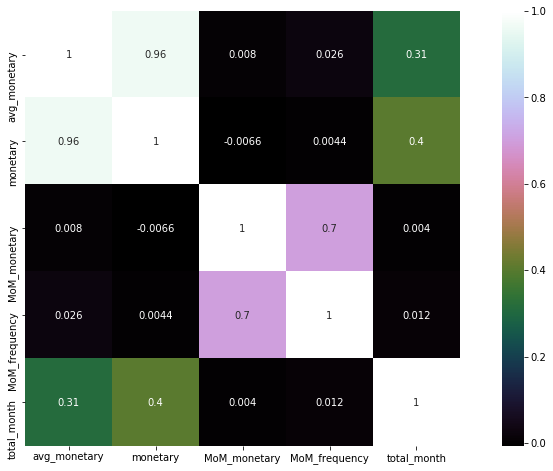

In [137]:
params_seller = ['avg_monetary','monetary', 'MoM_monetary', 'MoM_frequency', 'total_month']

data_seller = seller_growth[params_seller]

correlation = data_seller.corr()
plt.figure(figsize=(15, 8))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [239]:
seller = seller_growth[['seller_id','total_month','MoM_monetary', 'MoM_frequency']]

In [240]:
seller.head()

,seller_id,total_month,MoM_monetary,MoM_frequency
0,61.0,5,183.16,17.87
1,64.0,1,0.00,0.00
2,69.0,1,0.00,0.00
3,84.0,6,-23.60,-3.16
4,86.0,5,775.18,197.68


### RFM Features

In [140]:
df1.head(2)

,Created At,Partner,Cluster,Customer Number,Denom,Product Type,Sell Price,seller_id,Status,role_name,trx_month
0,2018-05-01,Golden Technology,Lampung,089632143632,10000,Mobile,10100.0,28127.0,success,SELLER,2018-05
1,2018-05-01,Lapak Kita,Tegal,082242160882,50000,Mobile,49200.0,25569.0,success,SELLER,2018-05


In [141]:
# Group the dataframe by user_id
aggs = {}
aggs['Product Type'] = 'count'
aggs['Created At'] = ['min', 'max']
aggs['Customer Number'] = 'nunique'
aggs['Sell Price'] = 'sum'

seller_rfm = df1.groupby('seller_id', as_index=False).agg(aggs)
print aggs

{'Sell Price': 'sum', 'Product Type': 'count', 'Customer Number': 'nunique', 'Created At': ['min', 'max']}


In [142]:
seller_rfm.columns = ['seller_id', 'monetary', 'frequency', 'total_cust', 'first_trx', 'last_trx']

In [143]:
seller_rfm.head()

,seller_id,monetary,frequency,total_cust,first_trx,last_trx
0,61.0,6267960.0,124,102,2018-06-02,2018-10-29
1,64.0,311200.0,11,10,2018-10-18,2018-10-25
2,69.0,20770.0,1,1,2018-08-01,2018-08-01
3,84.0,4650550.0,93,68,2018-05-08,2018-10-16
4,86.0,3058500.0,82,55,2018-06-02,2018-10-31


In [149]:
seller_rfm['month_join'] = ((seller_rfm.last_trx - seller_rfm.first_trx)/np.timedelta64(1, 'M')).astype(int) + 1
seller_rfm['recency'] = (now_seller - seller_rfm['last_trx']).dt.days

In [150]:
seller_rfm['avg_mon_monthly'] = (seller_rfm['monetary'] / seller_rfm['month_join']).astype(int)
seller_rfm['avg_freq_monthly'] = (seller_rfm['frequency'] / seller_rfm['month_join']).astype(int)

In [151]:
seller_rfm['loyal_cust'] = seller_rfm['frequency'] - seller_rfm['total_cust']

In [241]:
seller_rfm.head()

,seller_id,monetary,frequency,total_cust,first_trx,last_trx,month_join,recency,avg_mon_monthly,avg_freq_monthly,loyal_cust
0,61.0,6267960.0,124,102,2018-06-02,2018-10-29,5,2,1253592,24,22
1,64.0,311200.0,11,10,2018-10-18,2018-10-25,1,6,311200,11,1
2,69.0,20770.0,1,1,2018-08-01,2018-08-01,1,91,20770,1,0
3,84.0,4650550.0,93,68,2018-05-08,2018-10-16,6,15,775091,15,25
4,86.0,3058500.0,82,55,2018-06-02,2018-10-31,5,0,611700,16,27


In [242]:
rfm_seller = seller_rfm[['seller_id', 'monetary', 'avg_mon_monthly', 'frequency', 'avg_freq_monthly', 'total_cust', 'recency', 'loyal_cust']]

In [243]:
rfm_seller.head()

,seller_id,monetary,avg_mon_monthly,frequency,avg_freq_monthly,total_cust,recency,loyal_cust
0,61.0,6267960.0,1253592,124,24,102,2,22
1,64.0,311200.0,311200,11,11,10,6,1
2,69.0,20770.0,20770,1,1,1,91,0
3,84.0,4650550.0,775091,93,15,68,15,25
4,86.0,3058500.0,611700,82,16,55,0,27


In [244]:
seller_fix = pd.merge(seller, rfm_seller, how='left', on=['seller_id'])

In [245]:
seller_fix.head()

,seller_id,total_month,MoM_monetary,MoM_frequency,monetary,avg_mon_monthly,frequency,avg_freq_monthly,total_cust,recency,loyal_cust
0,61.0,5,183.16,17.87,6267960.0,1253592,124,24,102,2,22
1,64.0,1,0.00,0.00,311200.0,311200,11,11,10,6,1
2,69.0,1,0.00,0.00,20770.0,20770,1,1,1,91,0
3,84.0,6,-23.60,-3.16,4650550.0,775091,93,15,68,15,25
4,86.0,5,775.18,197.68,3058500.0,611700,82,16,55,0,27


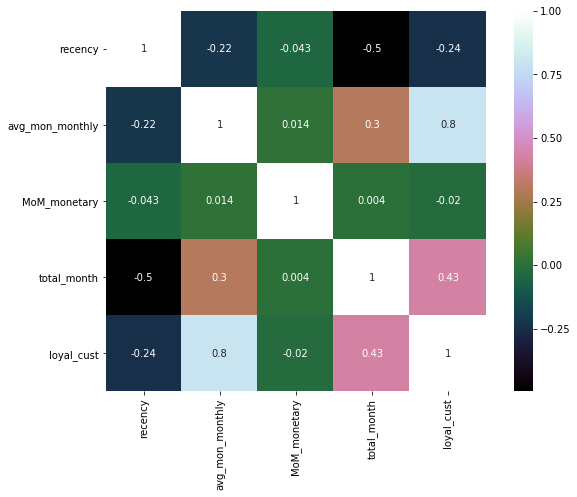

In [254]:
#params_seller = ['frequency','monetary', 'avg_mon_monthly', 'avg_freq_monthly', 'recency']
#params_seller = ['total_month','MoM_monetary', 'MoM_frequency', 'total_cust', 'loyal_cust']
params_seller = ['recency', 'avg_mon_monthly', 'MoM_monetary', 'total_month', 'loyal_cust']
data_seller = seller_fix[params_seller]

correlation = data_seller.corr()
plt.figure(figsize=(10, 7))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

## K-means

In [331]:
seller_train = seller_fix.copy()

In [311]:
#features_seller = ['monetary_growth', 'avg_monetary', 'recency', 'loyal_cust']
#features_seller = ['MoM_monetary', 'avg_monetary', 'recency']
#features_seller = ['recency', 'avg_freq_monthly', 'MoM_monetary']

In [332]:
features_seller = ['MoM_monetary', 'loyal_cust', 'recency']

In [333]:
# Training data
X = seller_train[features_seller]
X = X.values
X

array([[183.16,  22.  ,   2.  ],
       [  0.  ,   1.  ,   6.  ],
       [  0.  ,   0.  ,  91.  ],
       ...,
       [  0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ]])

In [334]:
# Scale the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[ 0.04799306, -0.34727962, -0.64659686],
       [-0.1295993 , -0.42804739, -0.5718595 ],
       [-0.1295993 , -0.43189348,  1.01630954],
       ...,
       [-0.1295993 , -0.43189348, -0.68396555],
       [-0.1295993 , -0.43189348, -0.68396555],
       [-0.1295993 , -0.43189348, -0.68396555]])

In [325]:
cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    kmeans = KMeans(cluster)
    kmeans.fit(X_scale)
    cluster_errors.append(kmeans.inertia_ )

Text(0,0.5,'cluster errors')

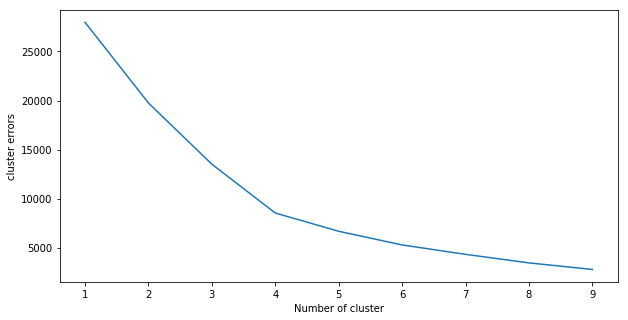

In [335]:
df_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

plt.figure(figsize=(10,5))
plt.plot(df_cluster.cluster, df_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

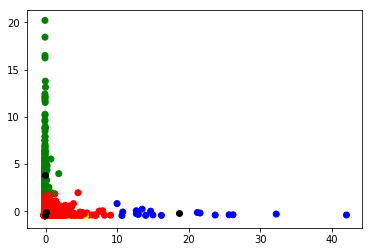

In [336]:
kmeans = KMeans(n_clusters=4, random_state =77) 
kmeans.fit(X_scale)
labels = kmeans.predict(X_scale)
centroids = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', 5:'pink' }
label_color = []
for label in labels:
    label_color.append(color_map[label])
    
plt.scatter(X_scale[:,0],X_scale[:,1], c=label_color)  
plt.scatter(centroids[:,0] ,centroids[:,1], color='black') 

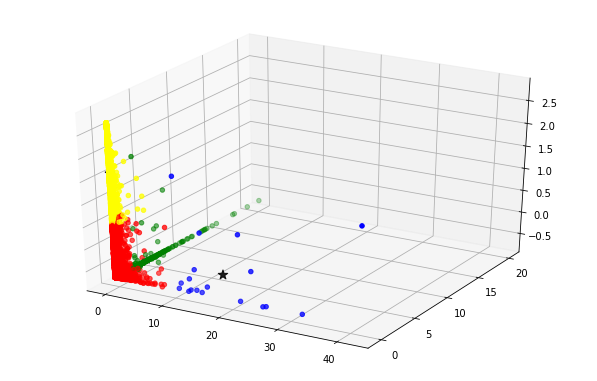

In [337]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X_scale[:, 0], X_scale[:, 1], X_scale[:, 2], c=label_color)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black', s=100)

In [344]:
seller_train.head()

,seller_id,total_month,MoM_monetary,MoM_frequency,monetary,avg_mon_monthly,frequency,avg_freq_monthly,total_cust,recency,loyal_cust,seller_segment
0,61.0,5,183.16,17.87,6267960.0,1253592,124,24,102,2,22,0
1,64.0,1,0.00,0.00,311200.0,311200,11,11,10,6,1,0
2,69.0,1,0.00,0.00,20770.0,20770,1,1,1,91,0,3
3,84.0,6,-23.60,-3.16,4650550.0,775091,93,15,68,15,25,0
4,86.0,5,775.18,197.68,3058500.0,611700,82,16,55,0,27,0


In [339]:
seller_train['seller_segment'] = labels

In [341]:
dump(kmeans, 'sellerModel.joblib')

['sellerModel.joblib']

In [342]:
# Check the result
aggs = {}
aggs['avg_mon_monthly'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['MoM_monetary'] = ['min', 'max', 'mean']
aggs['total_month'] = ['min', 'max', 'mean']
aggs['seller_id'] = 'count'

seller_train.groupby('seller_segment').agg(aggs)

MoM_monetary                         total_month                \
                        min       max          mean         min max      mean   
seller_segment                                                                  
0                    -99.85   9455.42    122.575988           1   6  3.797841   
1                  10395.69  43490.74  19339.433889           2   6  3.055556   
2                    -36.92   1990.92     30.140554           2   6  5.810496   
3                    -99.84   5856.42     26.739555           1   4  1.843182   

               recency                  seller_id avg_mon_monthly            \
                   min  max        mean     count             min       max   
seller_segment                                                                
0                    0   73    9.788672      6762            2240  28012841   
1                    0  135   28.000000        18          272354   8243650   
2                    0  132    1.329446       343         1108067  54767684   
3                   66  183  124.604545      2200            1150  13138675   

                              
                        mean  
seller_segment                
0               1.366288e+06  
1               2.387163e+06  
2               9.743260e+06  
3               5.682586e+05

In [343]:
seller_rfm[seller_rfm['loyal_cust'] == 5364]

,seller_id,monetary,frequency,total_cust,first_trx,last_trx,month_join,recency,avg_mon_monthly,avg_freq_monthly,loyal_cust
3378,27170.0,194025418.0,10900,5536,2018-05-01,2018-10-31,7,0,27717916,1557,5364


------------------------------------------------------------------------------------------------------------------

# Sales Agent

## Data Sales_Agent : Mei - Oct 2018

In [162]:
df_sales = pd.read_csv('sales_deposit.csv')

In [163]:
df_sales.head()

,uid_from,first_trx,last_trx,monetary,total_trx,month_join
0,2054,2018-05-04,2018-10-30,17695000.0,100,5
1,37615,2018-10-23,2018-10-23,500000.0,1,0
2,35025,2018-10-05,2018-10-31,20350000.0,39,0
3,2334,2018-05-19,2018-10-31,40015000.0,42,5
4,2024,2018-05-01,2018-10-31,85000000.0,463,5


In [69]:
df_sales.last_trx = pd.to_datetime(df_sales['last_trx']).dt.date
df_sales.first_trx = pd.to_datetime(df_sales['first_trx']).dt.date
df_sales['monetary'] = df_sales['monetary'].astype(int)

In [70]:
print min (df_sales['first_trx'])
print max (df_sales['last_trx'])

2018-05-01
2018-10-31


In [71]:
df_sales['month_join'] = df_sales['month_join'] + 1

In [72]:
df_sales = df_sales.rename(columns = {'uid_from':'seller_id'})

In [73]:
df_sales.head()

,seller_id,first_trx,last_trx,monetary,total_trx,month_join
0,2054,2018-05-04,2018-10-30,17695000,100,6
1,37615,2018-10-23,2018-10-23,500000,1,1
2,35025,2018-10-05,2018-10-31,20350000,39,1
3,2334,2018-05-19,2018-10-31,40015000,42,6
4,2024,2018-05-01,2018-10-31,85000000,463,6


In [74]:
print df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 6 columns):
seller_id     601 non-null int64
first_trx     601 non-null object
last_trx      601 non-null object
monetary      601 non-null int64
total_trx     601 non-null int64
month_join    601 non-null int64
dtypes: int64(4), object(2)
memory usage: 28.2+ KB
None


In [75]:
# Assign 'now' as max date
now = dt.date(2018,10,31)

In [76]:
df_sales['recency'] = (now - df_sales['last_trx']).dt.days

In [77]:
df_sales['avg_monthly'] = (df_sales['monetary'] / df_sales['month_join']).astype(int)

In [78]:
df_sales.head()

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly
0,2054,2018-05-04,2018-10-30,17695000,100,6,1,2949166
1,37615,2018-10-23,2018-10-23,500000,1,1,8,500000
2,35025,2018-10-05,2018-10-31,20350000,39,1,0,20350000
3,2334,2018-05-19,2018-10-31,40015000,42,6,0,6669166
4,2024,2018-05-01,2018-10-31,85000000,463,6,0,14166666


In [79]:
df_sales[df_sales['seller_id'] == 30534]

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly
449,30534,2018-10-23,2018-10-23,1120000,224,1,8,1120000


In [81]:
df_seller = pd.merge(df_sales, user_data, how='left', on=['seller_id'])
df_seller.head()

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly,fullname,phonenumber,created_at,role_name,total_user
0,2054,2018-05-04,2018-10-30,17695000,100,6,1,2949166,Fery_Lhoksukon,081375240007,2017-09-25 18:01:20,SALES AGENT,21.0
1,37615,2018-10-23,2018-10-23,500000,1,1,8,500000,SAIFUL ROHMAN,087777999474,2018-10-20 04:01:16,SALES AGENT,4.0
2,35025,2018-10-05,2018-10-31,20350000,39,1,0,20350000,MAKSUM,085719788878,2018-09-05 15:02:38,SALES AGENT,29.0
3,2334,2018-05-19,2018-10-31,40015000,42,6,0,6669166,BAGUS,082325508555,2017-09-25 18:01:38,SALES AGENT,11.0
4,2024,2018-05-01,2018-10-31,85000000,463,6,0,14166666,Rahmadi,082368904768,2017-09-25 18:01:19,SALES AGENT,24.0


In [82]:
df_seller['role_name'].unique()

array(['SALES AGENT', 'NO ACCESS', 'SELLER', 'Other', 'ADM', 'AGENT MD',
       'SADM'], dtype=object)

In [88]:
df_seller[df_seller['role_name'] == 'SELLER'].head()

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly,fullname,phonenumber,created_at,role_name,total_user
16,28288,2018-09-13,2018-10-23,8650000,20,2,8,4325000,CAHAYA CELL,082371484141,2018-04-02 11:57:19,SELLER,6.0
19,16255,2018-10-28,2018-10-28,150000,1,1,3,150000,Mufida,082177044774,2017-10-05 00:32:18,SELLER,1.0
71,20553,2018-06-28,2018-07-09,40000,4,2,114,20000,Seller Palugada,0895396773749,2018-01-11 11:23:40,SELLER,4.0
102,34922,2018-09-05,2018-09-05,100000,1,1,56,100000,usup nasir,085275311732,2018-09-05 09:15:54,SELLER,1.0
110,4667,2018-10-15,2018-10-31,2450000,14,1,0,2450000,Sri Hartati,082278344207,2017-09-25 18:11:47,SELLER,7.0


In [94]:
#Remove unnessary 'role_name' from dataframe
role_name = ['NO ACCESS', 'SELLER', 'Other', 'ADM', 'AGENT MD', 'SADM']

for i in role_name:
    df_seller = df_seller[df_seller['role_name'] != i]

In [95]:
df_seller['role_name'].unique()

array(['SALES AGENT'], dtype=object)

In [103]:
df_seller['avg_trx_monthly'] = (df_seller['total_trx'] / df_seller['month_join']).astype(int)

In [104]:
df_seller.head(3)

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly,fullname,phonenumber,created_at,role_name,total_user,avg_trx_monthly
0,2054,2018-05-04,2018-10-30,17695000,100,6,1,2949166,Fery_Lhoksukon,081375240007,2017-09-25 18:01:20,SALES AGENT,21.0,16
1,37615,2018-10-23,2018-10-23,500000,1,1,8,500000,SAIFUL ROHMAN,087777999474,2018-10-20 04:01:16,SALES AGENT,4.0,1
2,35025,2018-10-05,2018-10-31,20350000,39,1,0,20350000,MAKSUM,085719788878,2018-09-05 15:02:38,SALES AGENT,29.0,39


### Segmentation Modelling

In [106]:
seller_train = df_seller.copy()

# Drop unnecessary cols
seller_train = seller_train.drop(['first_trx','last_trx','fullname','phonenumber', 'created_at'] , 1)

In [108]:
seller_train['total_user'] = seller_train['total_user'].astype(int)

In [109]:
seller_train.head(3)

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,role_name,total_user,avg_trx_monthly
0,2054,17695000,100,6,1,2949166,SALES AGENT,21,16
1,37615,500000,1,1,8,500000,SALES AGENT,4,1
2,35025,20350000,39,1,0,20350000,SALES AGENT,29,39


### K-Means

In [119]:
parameters = ['monetary', 'total_trx', 'recency', 'month_join', 'avg_monthly', 'avg_trx_monthly', 'total_user']

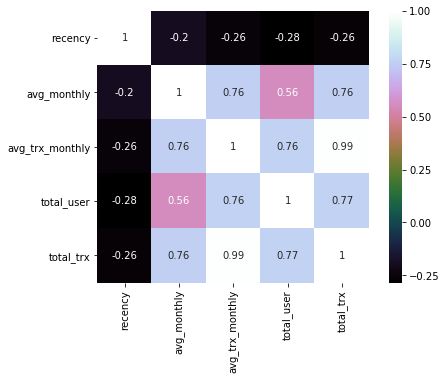

In [120]:
data = seller_train[features]

correlation = data.corr()
plt.figure(figsize=(7, 5))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [129]:
features = ['recency', 'avg_monthly', 'total_user']

In [130]:
# Training data
X = seller_train[features]
X = X.values
X

array([[       1,  2949166,       21],
       [       8,   500000,        4],
       [       0, 20350000,       29],
       ...,
       [     101, 18857833,        4],
       [       0,  6540833,       43],
       [       0, 20088333,       27]])

In [131]:
# Scale the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-0.34593605, -0.58756175, -0.23820631],
       [-0.13801734, -0.62766095, -0.80825235],
       [-0.37563873, -0.30266497,  0.03005064],
       ...,
       [ 2.62433127, -0.32709561, -0.80825235],
       [-0.37563873, -0.52875685,  0.49950032],
       [-0.37563873, -0.30694914, -0.0370136 ]])

In [132]:
cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    kmeans = KMeans(cluster)
    kmeans.fit(X_scale)
    cluster_errors.append(kmeans.inertia_ )

Text(0,0.5,'cluster errors')

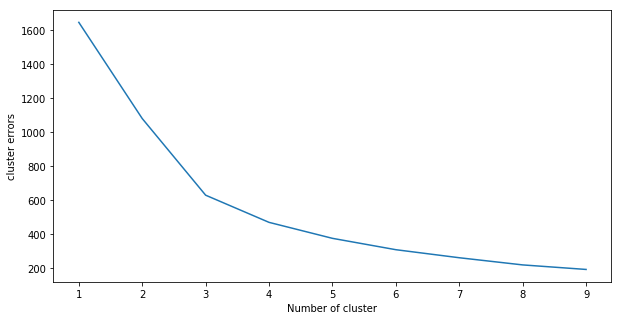

In [133]:
df_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

plt.figure(figsize=(10,5))
plt.plot(df_cluster.cluster, df_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

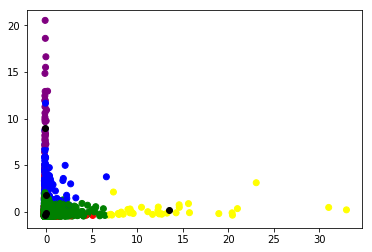

In [541]:
kmeans = KMeans(n_clusters=5, random_state =0) 
kmeans.fit(X_scale)
labels = kmeans.predict(X_scale)
centroids = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', }
label_color = []
for label in labels:
    label_color.append(color_map[label])
    
plt.scatter(X_scale[:,0],X_scale[:,1], c=label_color)  
plt.scatter(centroids[:,0] ,centroids[:,1], color='black') 

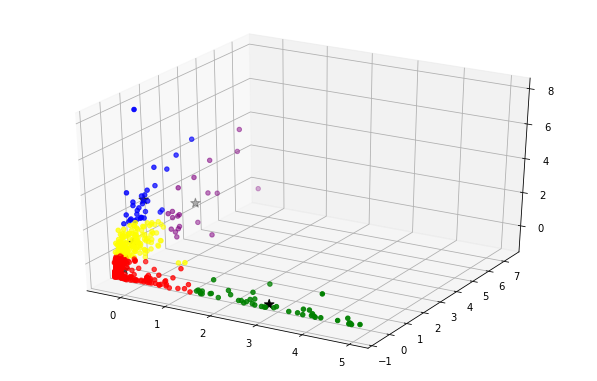

In [155]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X_scale[:, 0], X_scale[:, 1], X_scale[:, 2], c=label_color)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black', s=100)

In [141]:
seller_train['cluster_n_4'] = labels

In [145]:
seller_train['cluster_n_3'] = labels

In [156]:
seller_train['cluster_n_5'] = labels

In [146]:
print seller_train['cluster_n_3'].unique()
print seller_train['cluster_n_4'].unique()

[0 1 2]
[1 2 0 3]


In [148]:
seller_train[seller_train['cluster_n_3'] == 0].head()

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,role_name,total_user,avg_trx_monthly,cluster_n_4,cluster_n_3
0,2054,17695000,100,6,1,2949166,SALES AGENT,21,16,1,0
1,37615,500000,1,1,8,500000,SALES AGENT,4,1,1,0
2,35025,20350000,39,1,0,20350000,SALES AGENT,29,39,1,0
3,2334,40015000,42,6,0,6669166,SALES AGENT,11,7,1,0
4,2024,85000000,463,6,0,14166666,SALES AGENT,24,77,1,0


In [150]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['total_trx'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['total_user'] = ['min', 'max', 'mean']
aggs['seller_id'] = 'count'

seller_train.groupby('cluster_n_3').agg(aggs)

total_trx                    seller_id recency                   \
                  min   max         mean     count     min  max        mean   
cluster_n_3                                                                   
0                   1  1154   216.684211       399       0   54    4.017544   
1                   1   240    24.319149        47      57  181  113.127660   
2                  93  3922  1038.000000       103       0   18    0.223301   

             monetary                           total_user                  
                  min         max          mean        min  max       mean  
cluster_n_3                                                                 
0               20000   715571000  1.035175e+08          0   69  19.904762  
1               35000   318700000  1.671092e+07          0   44   4.617021  
2            38975000  2939696000  7.796758e+08         13  265  70.582524

In [151]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['total_trx'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['total_user'] = ['min', 'max', 'mean']
aggs['seller_id'] = 'count'

seller_train.groupby('cluster_n_4').agg(aggs)

total_trx                    seller_id recency                   \
                  min   max         mean     count     min  max        mean   
cluster_n_4                                                                   
0                  69  2048   768.790210       143       0   18    0.251748   
1                   1   884   167.528902       346       0   57    4.760116   
2                   1   240    24.521739        46      61  181  114.347826   
3                 945  3922  1820.285714        14       0    0    0.000000   

              monetary                           total_user                   
                   min         max          mean        min  max        mean  
cluster_n_4                                                                   
0             21875000  1660766119  5.201408e+08         13  134   55.468531  
1                20000   498200000  7.008240e+07          0   48   16.080925  
2                35000   318700000  1.704420e+07          0   44    4.695652  
3            523002500  2939696000  1.641631e+09         22  265  122.642857

In [153]:
seller_train[seller_train['total_user'] == 0].head()

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,role_name,total_user,avg_trx_monthly,cluster_n_4,cluster_n_3
85,19124,20000,2,2,9,10000,SALES AGENT,0,1,1,0
119,20932,25850000,45,1,167,25850000,SALES AGENT,0,45,2,1
150,26065,18010000,70,6,6,3001666,SALES AGENT,0,11,1,0
220,1522,12113000,23,2,135,6056500,SALES AGENT,0,11,2,1
240,19256,73060000,159,5,36,14612000,SALES AGENT,0,31,1,0


In [159]:
seller_train[seller_train['seller_id'] == 20932].head()

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,role_name,total_user,avg_trx_monthly,cluster_n_4,cluster_n_3,cluster_n_5
119,20932,25850000,45,1,167,25850000,SALES AGENT,0,45,2,1,2


In [198]:
len(seller_train)

549

------------------------------------------------------------------------------------------------------------------

## Data Sales_Agent : January - June 2018

In [185]:
df_deposit = pd.read_csv('Sales_Jan_Jun18.csv')

In [186]:
df_deposit.head(3)

,uid_from,first_trx,last_trx,monetary,total_trx,month_join
0,2054,2018-02-09,2018-06-25,12850000.0,68,5
1,2334,2018-02-08,2018-06-13,5540000.0,8,5
2,2024,2018-02-06,2018-06-30,73350000.0,370,5


### Cleaning

In [187]:
df_deposit.last_trx = pd.to_datetime(df_deposit['last_trx']).dt.date
df_deposit.first_trx = pd.to_datetime(df_deposit['first_trx']).dt.date
df_deposit['monetary'] = df_deposit['monetary'].astype(int)
df_deposit = df_deposit.rename(columns = {'uid_from':'seller_id'})

In [188]:
print df_deposit['last_trx'].max()
print df_deposit['first_trx'].min()

2018-06-30
2018-01-01


In [189]:
print df_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 6 columns):
seller_id     484 non-null int64
first_trx     484 non-null object
last_trx      484 non-null object
monetary      484 non-null int64
total_trx     484 non-null int64
month_join    484 non-null int64
dtypes: int64(4), object(2)
memory usage: 22.8+ KB
None


In [191]:
now = dt.date(2018,6,30)

In [192]:
## New columns ##
df_deposit['recency'] = (now - df_deposit['last_trx']).dt.days
df_deposit['avg_monthly'] = (df_deposit['monetary'] / df_deposit['month_join']).astype(int)
df_deposit['avg_trx_monthly'] = (df_deposit['total_trx'] / df_deposit['month_join']).astype(int)

In [193]:
df_deposit.head(3)

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly
0,2054,2018-02-09,2018-06-25,12850000,68,5,5,2570000,13
1,2334,2018-02-08,2018-06-13,5540000,8,5,17,1108000,1
2,2024,2018-02-06,2018-06-30,73350000,370,5,0,14670000,74


In [194]:
## Merge dataframe ##
df_deposit = pd.merge(df_deposit, user_data, how='left', on=['seller_id'])
df_deposit.head()

,seller_id,first_trx,last_trx,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly,fullname,phonenumber,created_at,role_name,total_user
0,2054,2018-02-09,2018-06-25,12850000,68,5,5,2570000,13,Fery_Lhoksukon,081375240007,2017-09-25 18:01:20,SALES AGENT,21.0
1,2334,2018-02-08,2018-06-13,5540000,8,5,17,1108000,1,BAGUS,082325508555,2017-09-25 18:01:38,SALES AGENT,11.0
2,2024,2018-02-06,2018-06-30,73350000,370,5,0,14670000,74,Rahmadi,082368904768,2017-09-25 18:01:19,SALES AGENT,24.0
3,21012,2018-05-12,2018-06-30,87590000,73,2,0,43795000,36,Qodir Sales Sampang,085233716434,2018-01-29 09:51:59,SALES AGENT,18.0
4,28356,2018-04-13,2018-06-30,19847000,178,3,0,6615666,59,Budi cell,085330461574,2018-04-03 16:38:01,SALES AGENT,17.0


In [195]:
df_deposit['role_name'].unique()

array(['SALES AGENT', 'NO ACCESS', 'SELLER', 'Other', 'AGENT MD',
       'MGR DAERAH', 'SADM'], dtype=object)

In [196]:
#Remove unnessary 'role_name' from dataframe
df_deposit = df_deposit[df_deposit['role_name'] == 'SALES AGENT']
    
df_deposit['role_name'].unique()

array(['SALES AGENT'], dtype=object)

In [197]:
len(df_deposit)

464

In [199]:
## Drop unnessary columns ##
deposit_train = df_deposit.copy()
deposit_train = deposit_train.drop(['first_trx','last_trx','fullname','phonenumber', 'created_at'] , 1)

In [201]:
deposit_train['total_user'] = deposit_train['total_user'].astype(int)
deposit_train.head(3)

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly,role_name,total_user
0,2054,12850000,68,5,5,2570000,13,SALES AGENT,21
1,2334,5540000,8,5,17,1108000,1,SALES AGENT,11
2,2024,73350000,370,5,0,14670000,74,SALES AGENT,24


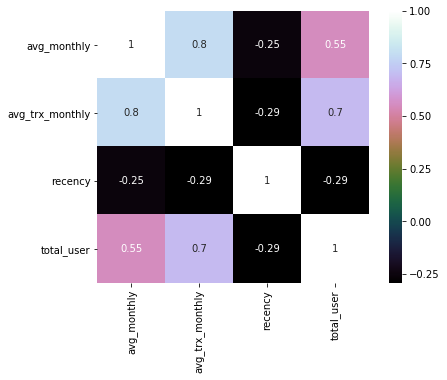

In [206]:
dataa = deposit_train[feature]

correlation = dataa.corr()
plt.figure(figsize=(7, 5))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [207]:
feature = ['avg_monthly', 'recency', 'total_user']

In [209]:
# Training data
X = deposit_train[feature]
X = X.values
X

array([[ 2570000,        5,       21],
       [ 1108000,       17,       11],
       [14670000,        0,       24],
       ...,
       [ 9323000,        1,       43],
       [13625000,        0,       27],
       [  110000,      157,        1]])

In [210]:
# Scale the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-0.55061644, -0.32253144, -0.32945761],
       [-0.58726284, -0.03329725, -0.64200786],
       [-0.24731861, -0.44304568, -0.23569253],
       ...,
       [-0.38134617, -0.41894284,  0.35815295],
       [-0.27351251, -0.44304568, -0.14192745],
       [-0.61227865,  3.34110158, -0.95455811]])

Text(0,0.5,'cluster errors')

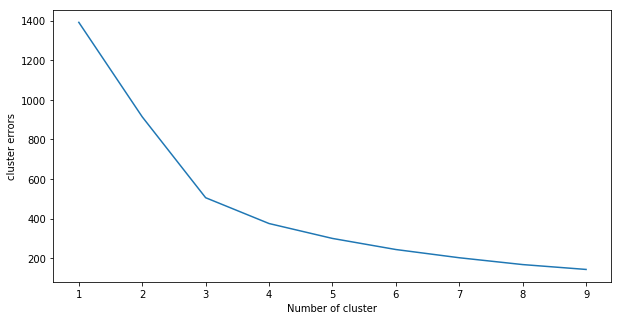

In [211]:
cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    kmeans = KMeans(cluster)
    kmeans.fit(X_scale)
    cluster_errors.append(kmeans.inertia_ )
    
df_clusters = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

plt.figure(figsize=(10,5))
plt.plot(df_clusters.cluster, df_clusters.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

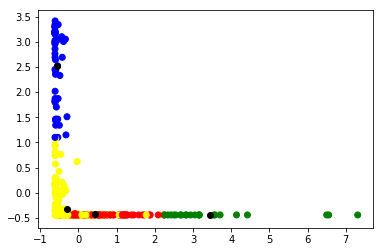

In [249]:
kmeans = KMeans(n_clusters=4, random_state = 77) 
kmeans.fit(X_scale)
labels = kmeans.predict(X_scale)
centroids = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow' }
label_color = []
for label in labels:
    label_color.append(color_map[label])
    
plt.scatter(X_scale[:,0],X_scale[:,1], c=label_color)  
plt.scatter(centroids[:,0] ,centroids[:,1], color='black') 

In [262]:
print labels

[3 3 3 3 3 3 1 3 3 3 0 3 3 3 3 3 1 0 3 0 3 3 3 1 0 3 1 3 0 3 0 1 2 3 3 3 3
 3 2 3 0 3 3 3 0 2 3 1 0 2 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 0 0 3 0 3 3 3 0 3
 1 3 3 3 3 3 3 3 3 1 3 3 3 3 0 3 1 1 1 3 0 3 3 3 3 0 3 0 2 1 0 0 3 3 3 3 3
 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 0 3 3 3 3 3 0 3 0 0 3 3 0 0 2 3 3
 3 3 2 1 3 3 1 3 3 3 3 0 3 3 3 3 1 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 2 3 2 3
 3 3 0 3 0 0 2 3 3 3 3 3 1 0 3 0 1 3 3 2 2 1 2 3 0 1 0 3 3 3 3 1 3 3 1 0 2
 3 3 3 3 2 3 3 1 1 3 3 3 0 0 0 3 0 0 3 3 0 3 3 3 3 3 3 0 2 3 0 3 3 0 1 0 0
 1 0 1 1 3 3 0 3 3 3 2 2 1 0 3 1 2 1 3 3 3 3 3 2 3 0 3 3 1 3 3 3 3 3 3 3 3
 1 3 3 1 3 0 3 1 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 0 0 3 3 3 0 0 3 3 0 3 0 0 3
 3 1 0 3 0 3 1 3 3 3 0 3 1 3 1 3 3 3 3 0 3 0 3 3 3 1 3 1 1 0 3 3 0 3 1 0 1
 1 3 3 3 3 3 3 3 3 3 3 3 0 3 1 3 3 1 3 0 3 3 0 3 3 3 1 3 2 3 3 3 3 3 0 3 3
 3 1 3 3 3 3 0 0 0 0 3 3 3 0 3 0 0 3 0 0 3 1 0 3 3 3 0 3 3 0 1 3 0 0 3 3 2
 1 0 3 1 3 0 1 3 3 3 3 3 1 3 3 3 3 3 3 1]


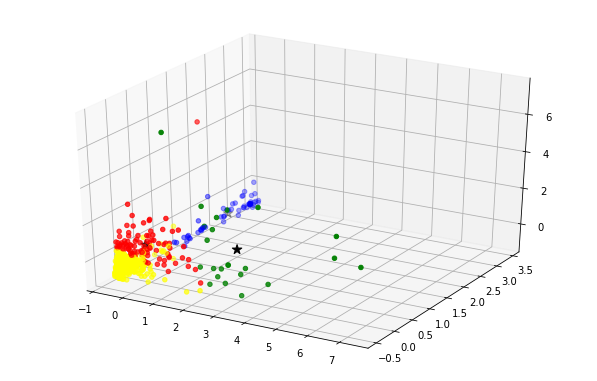

In [251]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X_scale[:, 0], X_scale[:, 1], X_scale[:, 2], c=label_color)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black', s=100)

In [252]:
deposit_train['cluster_n_4'] = labels

In [253]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['total_trx'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['total_user'] = ['min', 'max', 'mean']
aggs['seller_id'] = 'count'

deposit_train.groupby('cluster_n_4').agg(aggs)

total_trx                   seller_id recency                   \
                  min   max        mean     count     min  max        mean   
cluster_n_4                                                                  
0                   4  1296  487.387097        93       0   93    1.086022   
1                   1   135   16.410714        56      64  160  123.071429   
2                 112  2735  997.652174        23       0    0    0.000000   
3                   1   589  124.534247       292       0   63    5.260274   

              monetary                           total_user                  
                   min         max          mean        min  max       mean  
cluster_n_4                                                                  
0               300000   570498000  2.056075e+08         21  195  68.043011  
1                10000    46050000  4.493607e+06          0   56   7.875000  
2            422756500  1580758000  8.272592e+08         13  265  91.826087  
3                25000   314170119  5.684217e+07          0   48  19.705479

In [222]:
deposit_train['cluster_n_3'] = labels

In [223]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['total_trx'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['total_user'] = ['min', 'max', 'mean']
aggs['seller_id'] = 'count'

deposit_train.groupby('cluster_n_3').agg(aggs)

total_trx                   seller_id recency                   \
                  min   max        mean     count     min  max        mean   
cluster_n_3                                                                  
0                   1  1046  157.723837       344       0   63    4.488372   
1                   1   135   16.410714        56      64  160  123.071429   
2                   4  2735  787.187500        64       0   93    1.453125   

            monetary                           total_user                  
                 min         max          mean        min  max       mean  
cluster_n_3                                                                
0              25000   334714000  6.828489e+07          0   85  25.488372  
1              10000    46050000  4.493607e+06          0   56   7.875000  
2             300000  1580758000  4.883809e+08          7  265  84.781250

In [232]:
deposit_train.head(5)

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly,role_name,total_user,cluster_n_4,cluster_n_3
0,2054,12850000,68,5,5,2570000,13,SALES AGENT,21,1,0
1,2334,5540000,8,5,17,1108000,1,SALES AGENT,11,1,0
2,2024,73350000,370,5,0,14670000,74,SALES AGENT,24,1,0
3,21012,87590000,73,2,0,43795000,36,SALES AGENT,18,1,0
4,28356,19847000,178,3,0,6615666,59,SALES AGENT,17,1,0


In [254]:
## Save the model ##
from joblib import dump, load
dump(kmeans, 'salesModel.joblib')

['salesModel.joblib']

### Testing the model

In [226]:
test_data = pd.read_csv('Sales_Jul_Oct18.csv')

In [227]:
## Cleaning data ##
test_data.last_trx = pd.to_datetime(test_data['last_trx']).dt.date
test_data.first_trx = pd.to_datetime(test_data['first_trx']).dt.date
test_data['monetary'] = test_data['monetary'].astype(int)
test_data = test_data.rename(columns = {'uid_from':'seller_id'})

In [228]:
print test_data['last_trx'].max()

2018-10-31


In [229]:
## New columns ##
now = dt.date(2018,10,31)

test_data['recency'] = (now - test_data['last_trx']).dt.days
test_data['avg_monthly'] = (test_data['monetary'] / test_data['month_join']).astype(int)
test_data['avg_trx_monthly'] = (test_data['total_trx'] / test_data['month_join']).astype(int)

In [230]:
## Merge dataframe ##
test_data = pd.merge(test_data, user_data, how='left', on=['seller_id'])

#Remove unnessary 'role_name' from dataframe
test_data = test_data[test_data['role_name'] == 'SALES AGENT']
    
test_data['role_name'].unique()

array(['SALES AGENT'], dtype=object)

In [231]:
## Drop unnessary columns ##
deposit_test = test_data.copy()
deposit_test = deposit_test.drop(['first_trx','last_trx','fullname','phonenumber', 'created_at'] , 1)

deposit_test['total_user'] = deposit_test['total_user'].astype(int)
deposit_test.head(3)

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly,role_name,total_user
0,2054,10145000,60,4,1,2536250,15,SALES AGENT,21
1,37615,500000,1,1,8,500000,1,SALES AGENT,4
2,35025,20350000,39,1,0,20350000,39,SALES AGENT,29


In [255]:
model = load('salesModel.joblib') 

In [256]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=77, tol=0.0001, verbose=0)

In [241]:
featuress = ['avg_monthly', 'recency', 'total_user']

In [257]:
# Testing data
test = deposit_test[featuress]
test = test.values

# Scale the data
scaler = StandardScaler()
test_scale = scaler.fit_transform(test)
test_scale

array([[-6.05233680e-01, -3.20224045e-01, -2.63653214e-01],
       [-6.36207197e-01,  8.39902934e-03, -8.31265320e-01],
       [-3.34267690e-01, -3.67170199e-01,  3.45836555e-03],
       ...,
       [-4.21860569e-01,  4.37439130e+00, -8.31265320e-01],
       [-3.81117750e-01, -3.67170199e-01, -6.33195293e-02],
       [-5.91410630e-01, -3.67170199e-01,  4.70903630e-01]])

In [258]:
label_test = model.predict(test_scale)

In [259]:
deposit_test['cluster'] = label_test

In [245]:
deposit_test.head()

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly,role_name,total_user,cluster
0,2054,10145000,60,4,1,2536250,15,SALES AGENT,21,1
1,37615,500000,1,1,8,500000,1,SALES AGENT,4,1
2,35025,20350000,39,1,0,20350000,39,SALES AGENT,29,1
3,2334,34705000,38,4,0,8676250,9,SALES AGENT,11,1
4,2024,52350000,299,4,0,13087500,74,SALES AGENT,24,1


In [260]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['total_trx'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['total_user'] = ['min', 'max', 'mean']
aggs['seller_id'] = 'count'

deposit_test.groupby('cluster').agg(aggs)

total_trx                   seller_id recency                  \
              min   max        mean     count     min  max       mean   
cluster                                                                 
0              48  1525  567.475410       122       0    5   0.155738   
1               1   205   29.222222        45      31  121  70.444444   
2             302  2640  980.840000        25       0    0   0.000000   
3               1   786  135.011799       339       0   33   2.843658   

          monetary                           total_user                  
               min         max          mean        min  max       mean  
cluster                                                                  
0         13275000   699568125  3.111531e+08         16  134  60.524590  
1            10000   128100000  1.519685e+07          0   41   6.244444  
2        337046500  2185226650  1.041940e+09         13  265  83.800000  
3            20000   615305000  6.547860e+07          0   48  16.471976

In [261]:
label_test

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 2, 2, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 2, 0, 1, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       0, 3, 1, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 1, 2, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 2, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 1,
       3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 0, 1, 3, 0, 3, 3,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 3, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 0, 3, 2, 3, 0, 3, 3,
       0, 2, 0, 3, 3, 3, 3, 0, 2, 3, 2, 3, 3, 3, 0, 0, 1, 3, 1, 0, 3, 0,
       3, 3, 0, 2, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 1, 0, 0, 2, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3,

In [263]:
testing_X = model.predict(X_scale)

In [264]:
deposit_train['cluster_n_X'] = testing_X

In [268]:
deposit_train.head(10)

,seller_id,monetary,total_trx,month_join,recency,avg_monthly,avg_trx_monthly,role_name,total_user,cluster_n_4,cluster_n_3,cluster_n_X
0,2054,12850000,68,5,5,2570000,13,SALES AGENT,21,3,0,3
1,2334,5540000,8,5,17,1108000,1,SALES AGENT,11,3,0,3
2,2024,73350000,370,5,0,14670000,74,SALES AGENT,24,3,0,3
3,21012,87590000,73,2,0,43795000,36,SALES AGENT,18,3,0,3
4,28356,19847000,178,3,0,6615666,59,SALES AGENT,17,3,0,3
6,21023,43582500,29,6,0,7263750,4,SALES AGENT,37,3,0,3
7,19320,3650000,13,2,145,1825000,6,SALES AGENT,0,1,1,1
8,19239,50150000,186,6,0,8358333,31,SALES AGENT,14,3,0,3
9,19397,35005500,195,6,1,5834250,32,SALES AGENT,28,3,0,3
11,28363,17450000,107,3,0,5816666,35,SALES AGENT,13,3,0,3
